In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, LabelEncoder

In [3]:
df = pd.read_csv('dulieu/Breast_Cancer.csv')
df.head(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [6]:
print(df.isna().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


In [7]:

print(df.isnull().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


In [8]:
encoder = LabelEncoder()

columns = df.columns

for i in range(len(columns)):
    column = columns[i]
    df[column] = encoder.fit_transform(df[column])

df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,38,2,1,0,0,0,1,3,1,3,1,1,23,0,59,0
1,20,2,1,1,1,2,0,2,1,34,1,1,13,4,61,0
2,28,2,0,2,2,4,0,2,1,62,1,1,13,6,74,0
3,28,2,1,0,0,0,1,3,1,17,1,1,1,0,83,0
4,17,2,1,1,0,1,1,3,1,40,1,1,2,0,49,0


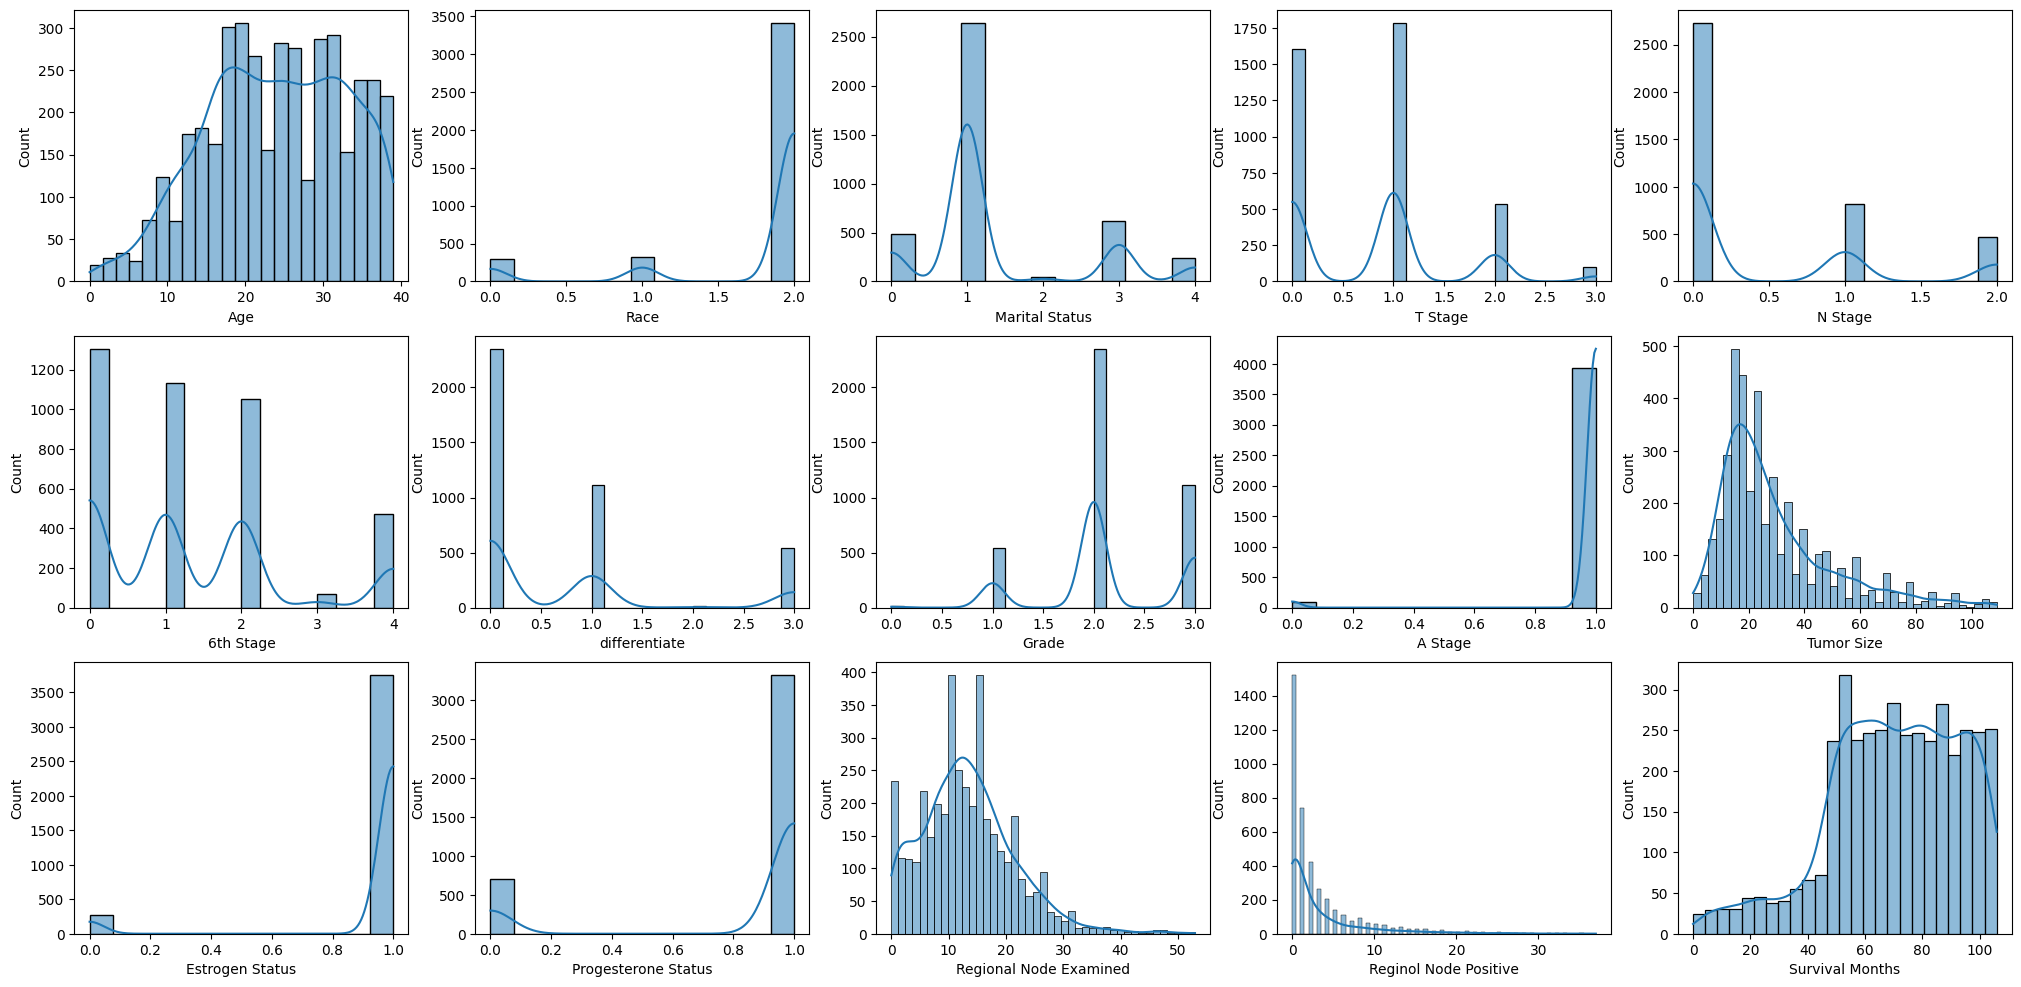

In [9]:
fig = plt.figure(figsize=(25,12))

columns = df.iloc[:, :-1].columns

for i in range(len(columns)):
    colname = columns[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sns.histplot(df, x=colname, kde=True)

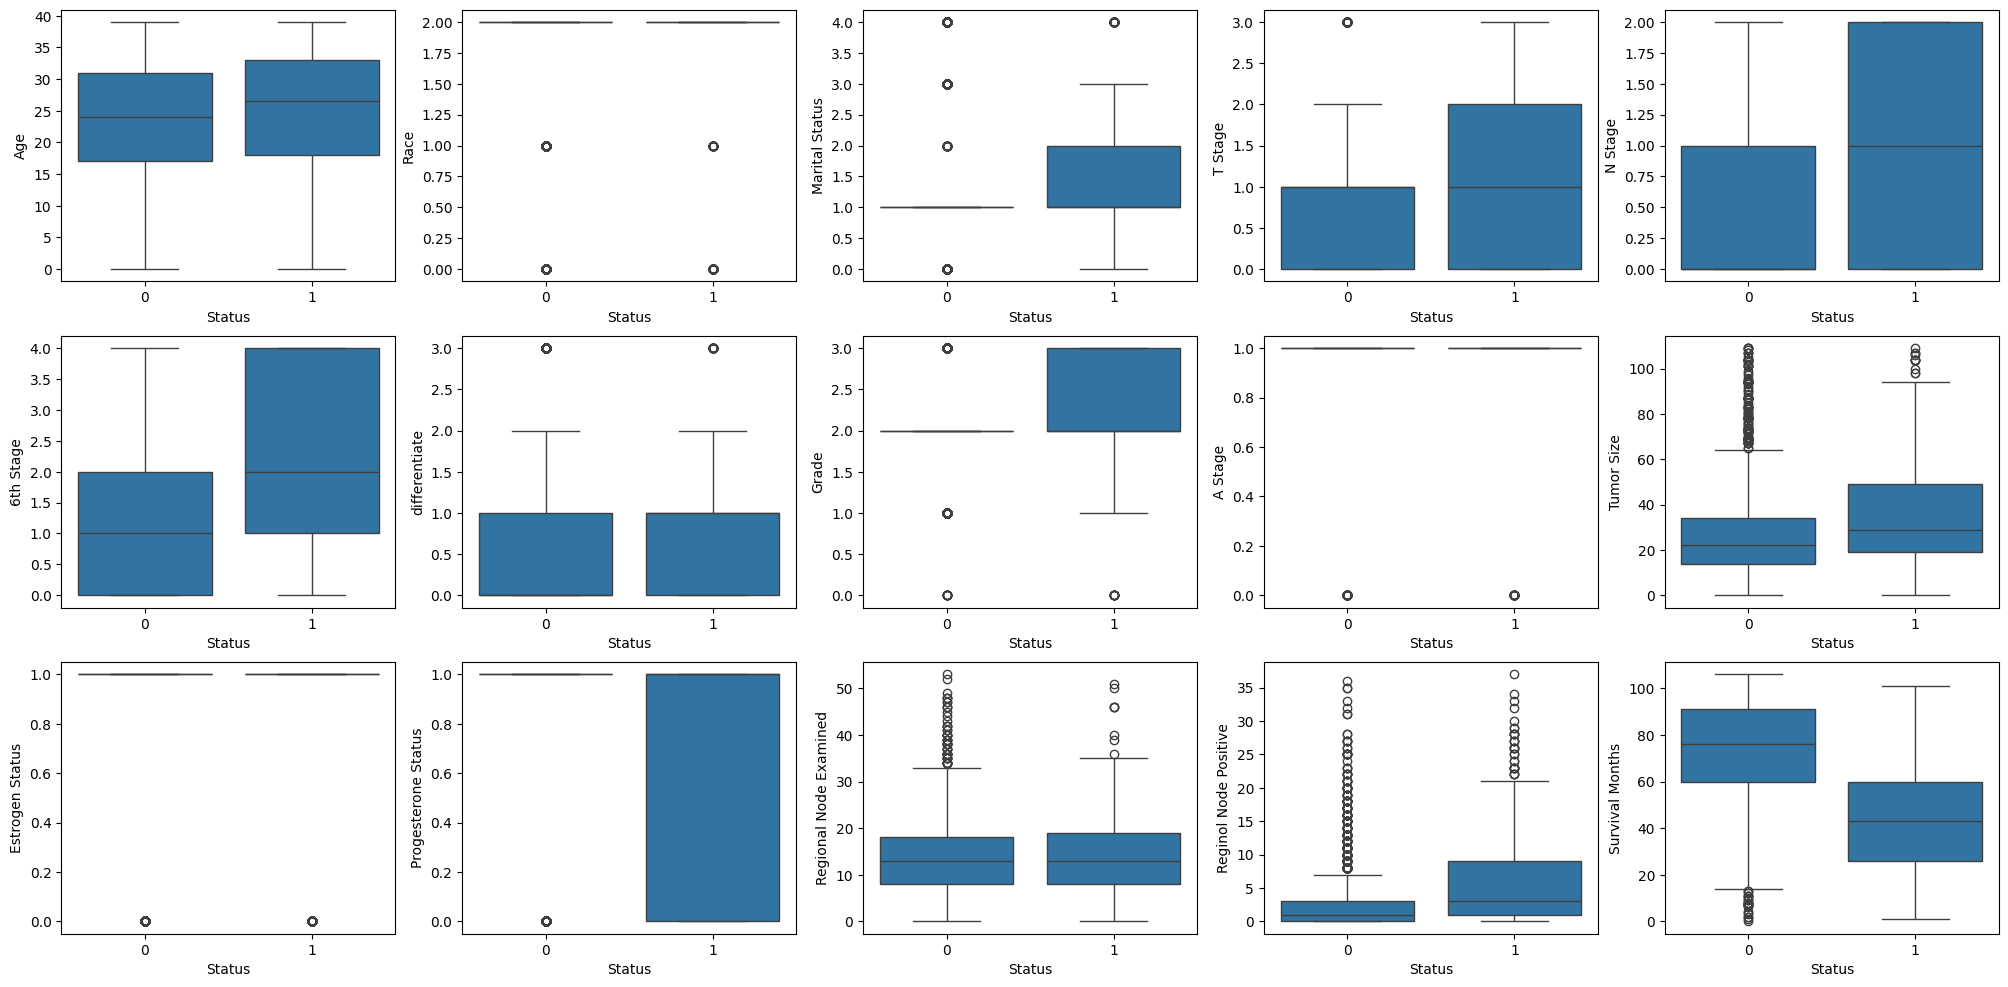

In [10]:
fig = plt.figure(figsize=(25,12))

columns = df.iloc[:, :-1].columns

for i in range(len(columns)):
    colname = columns[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sns.boxplot(df, y=colname, x='Status')

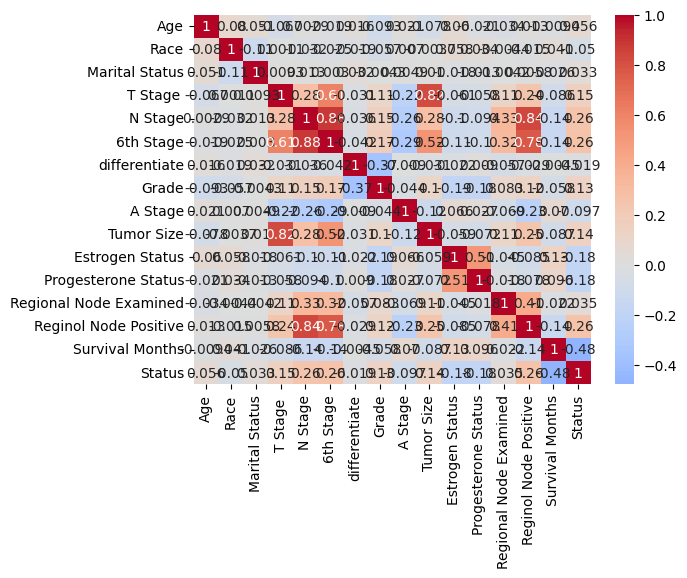

In [11]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.show()

Model: KNeighborsClassifier, Scaller: MinMaxScaler
accurcy score: 0.8708074534161491
confusion matrix:
 [[679   5]
 [ 99  22]]
roc: 0.587254120148857
classification report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       684
           1       0.81      0.18      0.30       121

    accuracy                           0.87       805
   macro avg       0.84      0.59      0.61       805
weighted avg       0.86      0.87      0.83       805

Model: KNeighborsClassifier, Scaller: MaxAbsScaler
accurcy score: 0.8708074534161491
confusion matrix:
 [[679   5]
 [ 99  22]]
roc: 0.587254120148857
classification report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       684
           1       0.81      0.18      0.30       121

    accuracy                           0.87       805
   macro avg       0.84      0.59      0.61       805
weighted avg       0.86      0.87      0.83       805

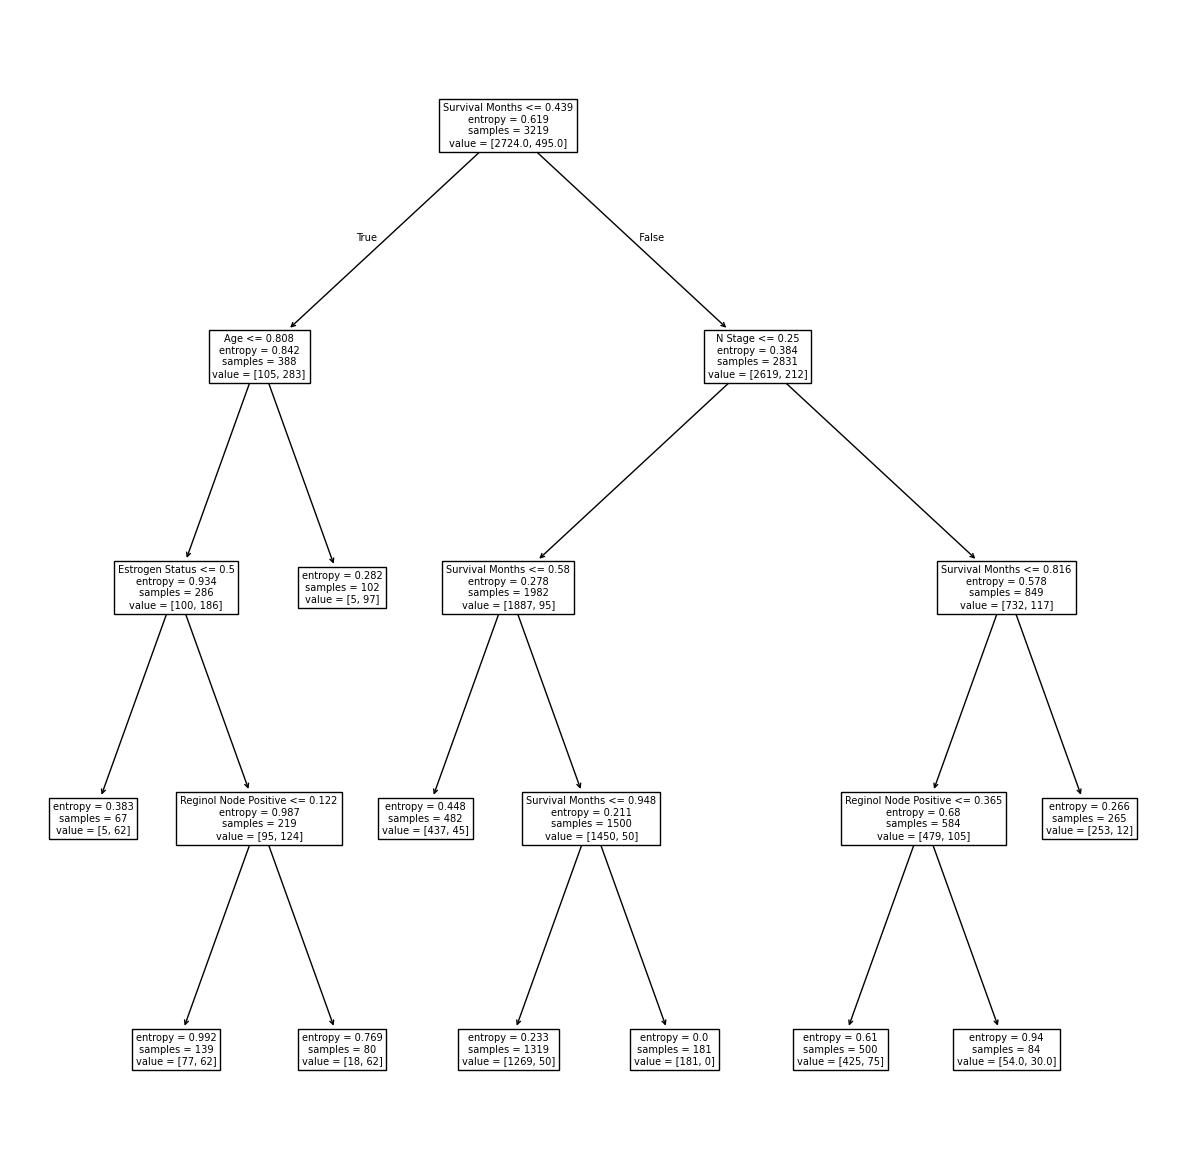

Model: DecisionTreeClassifier, Scaller: MaxAbsScaler
accurcy score: 0.8968944099378882
confusion matrix:
 [[676   8]
 [ 75  46]]
roc: 0.684234691411725
classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       684
           1       0.85      0.38      0.53       121

    accuracy                           0.90       805
   macro avg       0.88      0.68      0.73       805
weighted avg       0.89      0.90      0.88       805



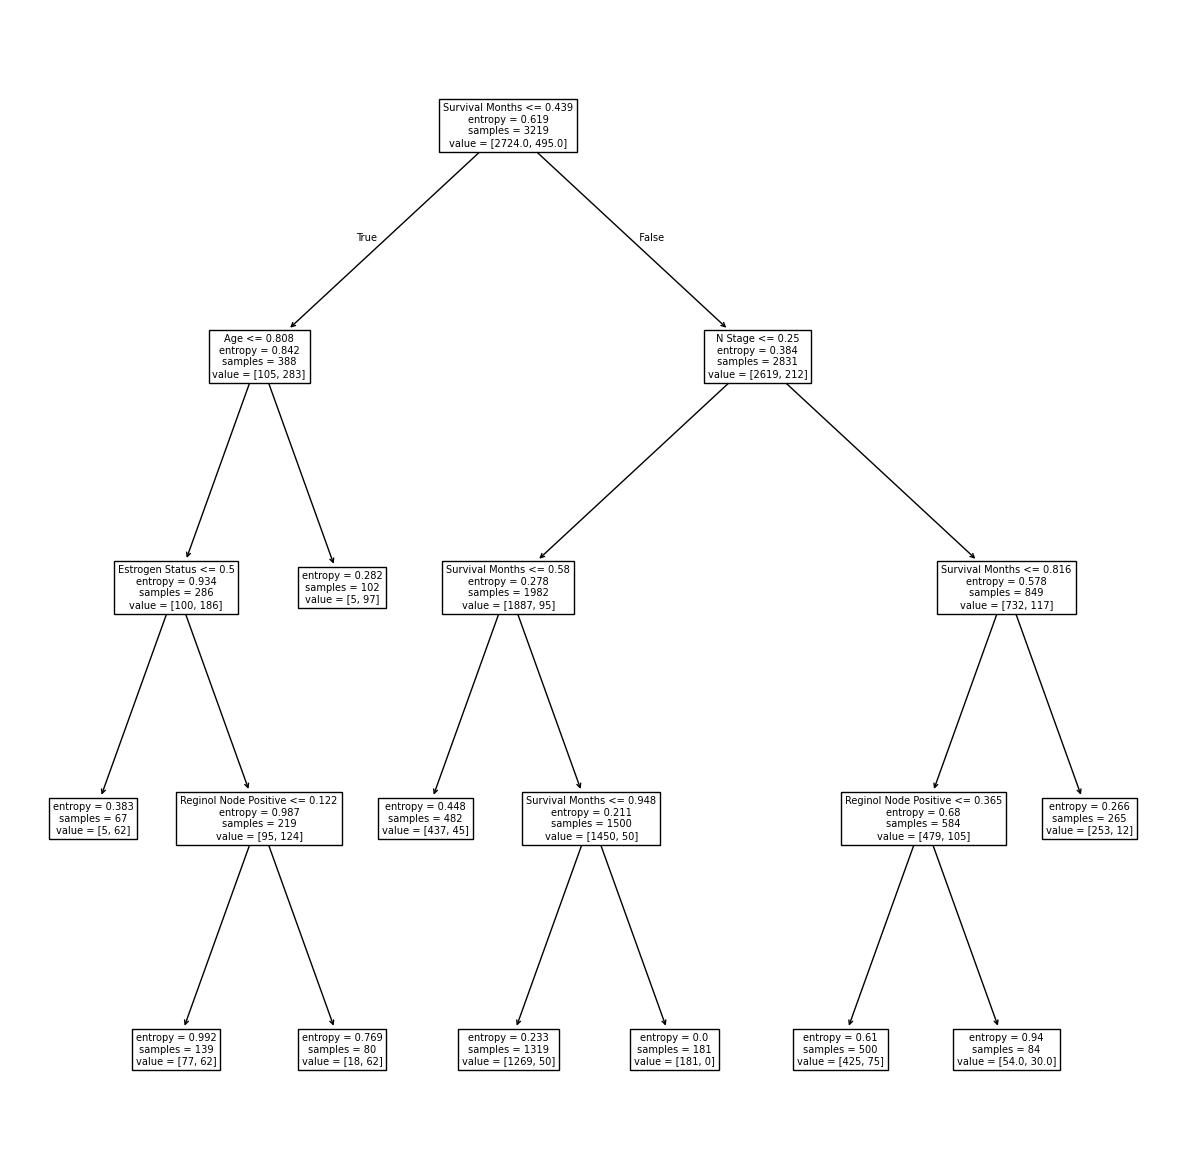

Model: DecisionTreeClassifier, Scaller: StandardScaler
accurcy score: 0.8968944099378882
confusion matrix:
 [[676   8]
 [ 75  46]]
roc: 0.684234691411725
classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       684
           1       0.85      0.38      0.53       121

    accuracy                           0.90       805
   macro avg       0.88      0.68      0.73       805
weighted avg       0.89      0.90      0.88       805



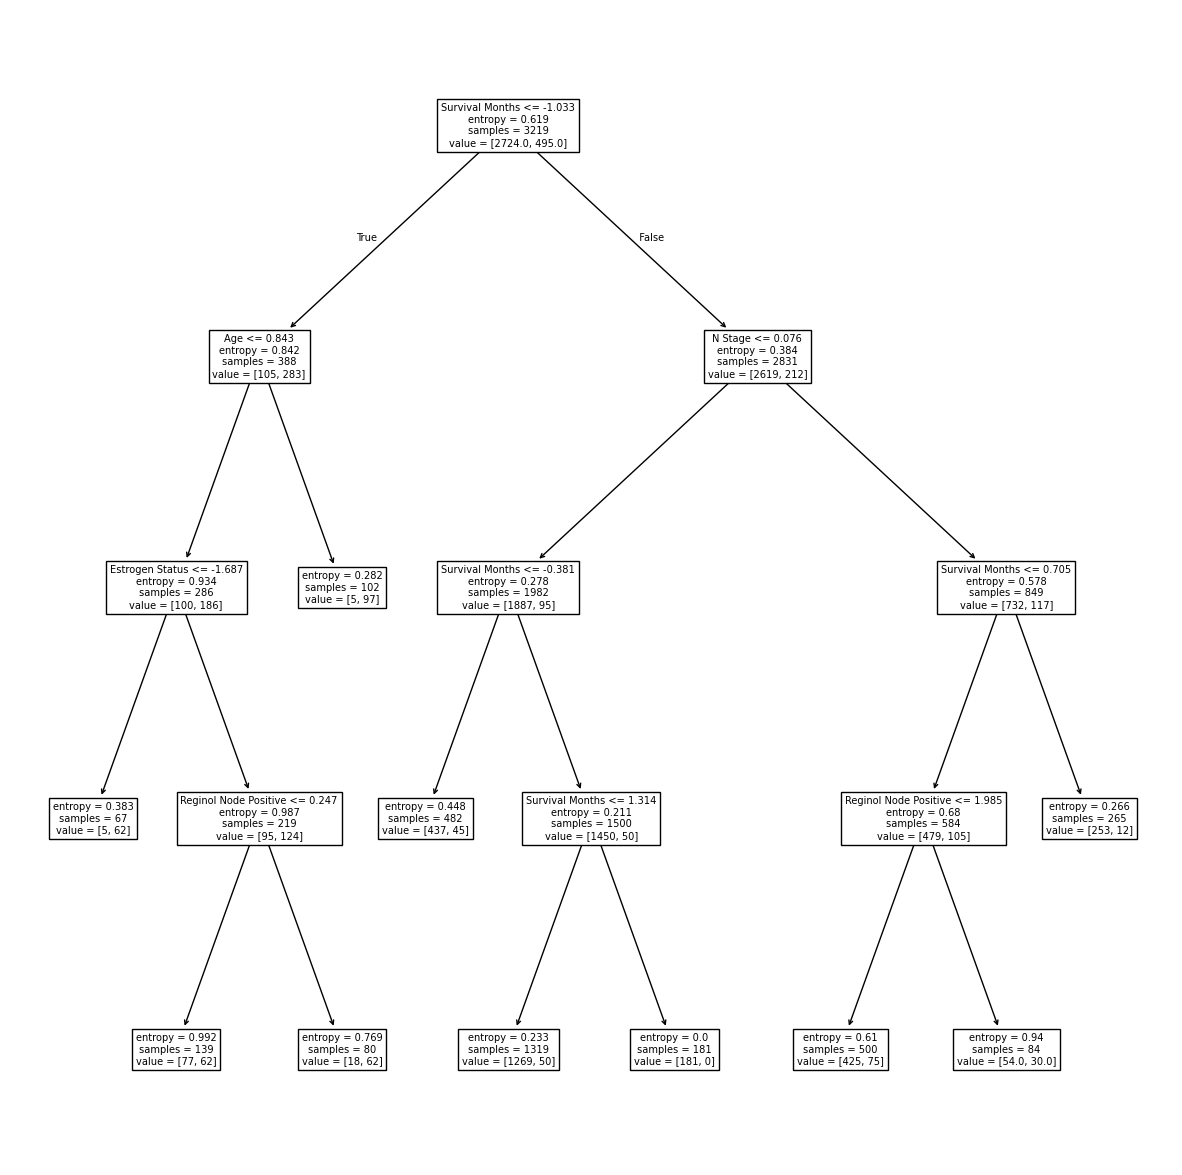

In [12]:
from sklearn.tree import plot_tree

def run_model(df, scaller, model):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

    X_train_scaled = scaller.fit_transform(X_train)
    X_test_scaled = scaller.transform(X_test)

    model.fit(X_train_scaled, y_train)

    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred = model.predict(X_test_scaled)
    # threshold = 0.9
    # y_pred = (y_pred_proba[:, -1] >= threshold).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    cfmx = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    fpr, tpr, threshholds = roc_curve(y_test, y_pred)

    print(f'Model: {model.__class__.__name__}, Scaller: {scaller.__class__.__name__}')
    print(f'accurcy score: {accuracy}')
    print(f'confusion matrix:\n {cfmx}')
    print(f'roc: {roc}')
    print(f'classification report:\n {class_report}')

    if model.__class__.__name__ == 'DecisionTreeClassifier':
        plt.figure(figsize=(15,15))
        features_name = X_train.columns
        plot_tree(model, feature_names=features_name)
        plt.show()

run_model(df, MinMaxScaler(), KNeighborsClassifier(n_neighbors=11))
run_model(df, MaxAbsScaler(), KNeighborsClassifier(n_neighbors=11))
run_model(df, StandardScaler(), KNeighborsClassifier(n_neighbors=11))

run_model(df, MinMaxScaler(), DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10))
run_model(df, MaxAbsScaler(), DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10))
run_model(df, StandardScaler(), DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10))
